In [6]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [7]:
def load_random_dataset(simulator_type):
    if not (simulator_type == "machine-of-death" or simulator_type == "saving-john"):
        raise ValueError("not a simulator...")
        
        
    df = pd.read_csv(f'../artifacts/random-{simulator_type}-rewards.csv', names=['rewards'])
    df = df.reset_index().rename(columns={"index": "episode"})
    return df

In [8]:
def load_saving_john(param, episodes):
    df = pd.read_csv(f'data/test_sj_param{param}_ep{episodes}.csv', names=['rewards'])
    df = df.reset_index().rename(columns={"index": "episode"})
    return df

In [9]:
random_dataset = load_random_dataset("saving-john")
sj_param1 = load_saving_john(param=1, episodes=511)
sj_param2 = load_saving_john(param=2, episodes=511)
sj_param3 = load_saving_john(param=3, episodes=511)

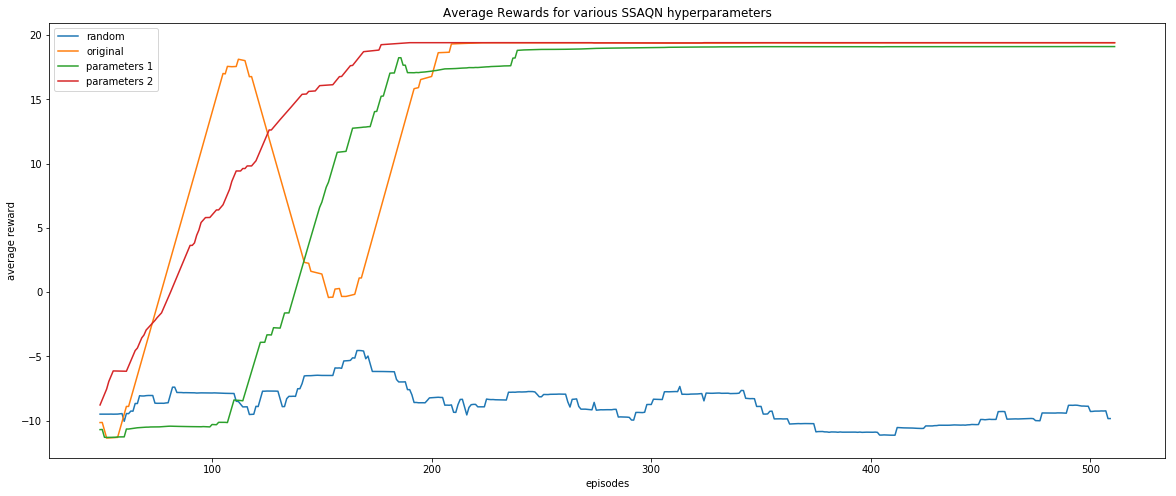

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(random_dataset['rewards'].rolling(50).mean(), label="random")
ax.plot(sj_param1['rewards'].rolling(50).mean(), label="original")
ax.plot(sj_param2['rewards'].rolling(50).mean(), label="parameters 1")
ax.plot(sj_param3['rewards'].rolling(50).mean(), label="parameters 2")
plt.xlabel("episodes")
plt.ylabel("average reward")
plt.title("Average Rewards for various SSAQN hyperparameters")
ax.legend()